# Problem Set 4


## Question 1

As in [Applied Linear Algebra](https://datascience.quantecon.org/../scientific/applied_linalg.html):

Consider an economy where in any given year, $ \alpha = 4\% $ of current employed workers lose their jobs and
$ \phi = 15\% $ of unemployed workers find jobs.

Define the vector $ x_0 = \begin{bmatrix} 650,000 & 150,000 \end{bmatrix} $ as the number of
employed and unemployed workers (respectively) at time $ 0 $ in the economy.

Adapting the code from the lecture notes, plot the unemployment rate over time in this economy for $ t = 0, \ldots 20 $ (i.e. number of employed over the total number of workers).

[[650000.         150000.        ]
 [646500.         153500.        ]
 [643665.         156335.        ]
 [641368.65       158631.35      ]
 [639508.6065     160491.3935    ]
 [638001.971265   161998.028735  ]
 [636781.59672465 163218.40327535]
 [635793.09334697 164206.90665303]
 [634992.40561104 165007.59438896]
 [634343.84854494 165656.15145506]
 [633818.51732141 166181.48267859]
 [633392.99903034 166607.00096966]
 [633048.32921457 166951.67078543]
 [632769.1466638  167230.8533362 ]
 [632543.00879768 167456.99120232]
 [632359.83712612 167640.16287388]
 [632211.46807216 167788.53192784]
 [632091.28913845 167908.71086155]
 [631993.94420214 168006.05579786]
 [631915.09480374 168084.90519626]]


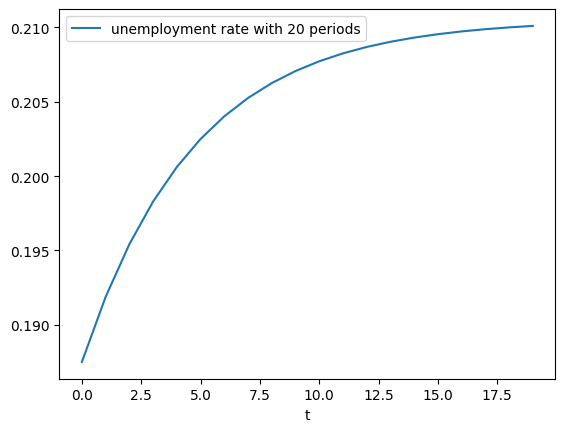

In [38]:
import numpy as np
import matplotlib.pyplot as plt
alpha = 0.04
phi = 0.15
x0 = np.array([650_000, 150_000])
A = np.array([[1-alpha, alpha], [phi, 1-phi]])


def simulate(x0, A, T=20):

    nX = x0.shape[0]
    out = np.zeros((T, nX))
    out[0, :] = x0

    for t in range(1, T):
        out[t, :] = A.T @ out[t-1, :]

    return out


print(simulate(x0, A, T=20))

# plot the unemployment rate over time in this economy for  𝑡=0,…20
Simulation = simulate(x0, A, T=20)
# using the second column(unemployment workers)/total number of workers
unemployment = Simulation[:, 1]/(Simulation[:, 0]+Simulation[:, 1])

fig, ax = plt.subplots()
ax.plot(unemployment)
ax.set_xlabel("t")
ax.legend(["unemployment rate with 20 periods"])


Continue the simulation for 1000 periods to find a long-run unemployment rate (when it converges).

 The long run unemplyemnt rate is 0.21052631578947356


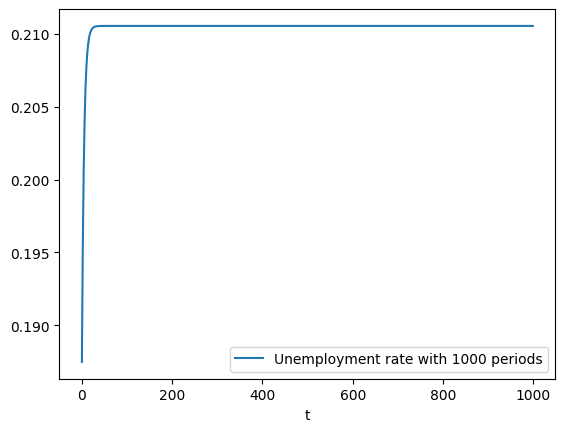

In [39]:
import matplotlib.pyplot as plt
# simulation for 1000 periods to find a long-run unemployment rate (when it converges)
Simulation = simulate(x0, A, T=1000)
# using the second column(unemployment workers)/total number of workers
unemployment = Simulation[:, 1]/(Simulation[:, 0]+Simulation[:, 1])


def plot_simulation(x0, A, T=1000):
    X = simulate(x0, A, T)
    fig, ax = plt.subplots()
    ax.plot(unemployment)
    ax.set_xlabel("t")
    ax.legend(["Unemployment rate with 1000 periods"])
    return ax


plot_simulation(x0, A, 1000)
print(f" The long run unemplyemnt rate is {unemployment[999]}")


## Question 2

Wikipedia and other credible statistics sources tell us that the mean and
variance of the Uniform(0, 1) distribution are (1/2, 1/12) respectively.

How could we check whether the Numpy random numbers approximate these
values? (*hint*: some functions in [Introduction to Numpy](https://datascience.quantecon.org/../scientific/numpy_arrays.html) and [Randomness](https://datascience.quantecon.org/../scientific/randomness.html) might be useful)

Please only use the functions in the Numpy package (i.e., don't use `scipy.stats`) to answer this question.

In [40]:
# we draw a larger number by approximaing the normal distribution(0,1), set the sample size n=100000 by chosing the random numbers in the range(0,1)
# when n is big enough, the sample mean and variance will be closer to ubderlying distibution (1/2,1/12)
N = 10_000_000
error = 0.0001
x = np.random.rand(N)
# we define the mean of sample


def mean(N):
    x = np.random.rand(N)
    return x.mean()
# we define the variance of sample


def variance(N):
    x = np.random.rand(N)
    return x.std()**2


# checking steps
if abs(mean(N)-1/2) <= error:
    print("Mean approxiamte uniform distribution mean 1/2")
else:
    print("Mean not approxiamte uniform distribution mean 1/2")

if abs(variance(N)-1/12) <= error:
    print("Variance approxiamte uniform distribution variance 1/12")
else:
    print("Variance not approxiamte uniform distribution variance 1/12")
# The result of sample mean and sample is near to the (1/2,1/12), so the numpy random numbers approximate these values well.


Mean approxiamte uniform distribution mean 1/2
Variance approxiamte uniform distribution variance 1/12


## Question 3

Assume you have been given the opportunity to choose between one of three financial assets.

You will be given the asset for free, allowed to hold it indefinitely, and will keep all payoffs.

Also assume the assets’ payoffs are distributed as follows (the notations are the same as in “Continuous Distributions” subsection of [Randomness](https://datascience.quantecon.org/../scientific/randomness.html)):

1. Normal with $ \mu = 10, \sigma = 5 $  
1. Gamma with $ k = 5.3, \theta = 2 $  
1. Gamma with $ k = 5, \theta = 2 $  


Use `scipy.stats` to answer the following questions:

- Which asset has the highest average returns?  
- Which asset has the highest median returns?  
- Which asset has the lowest coefficient of variation, i.e., standard deviation divided by mean?  
- Which asset would you choose? Why? (There is not a single right answer here. Just be creative and express your preferences.)  


You can find the official documentation of `scipy.stats` [here](https://docs.scipy.org/doc/scipy/reference/stats.html)

In [41]:
from scipy.stats import rv_continuous
from scipy.stats import gamma
from scipy.stats import norm
# Normal with  𝜇=10,𝜎=5
mu = 10
sigma = 5
median1 = rv_continuous.median(norm, mu, sigma)
mean1 = rv_continuous.mean(norm, mu, sigma)
coeff_var1 = rv_continuous.std(norm, mu, sigma)/mean1
print(median1)
print(mean1)
print(coeff_var1)
# Gamma with  𝑘=5.3,𝜃=2
k = 5.3
theta = 2
median2 = rv_continuous.median(gamma, k, theta)
mean2 = rv_continuous.mean(gamma, k, theta)
coeff_var2 = rv_continuous.std(gamma, k, theta)/mean2
print(median2)
print(mean2)
print(coeff_var2)
# Gamma with  𝑘=5,𝜃=2
k = 5
theta = 2
median3 = rv_continuous.median(gamma, k, theta)
mean3 = rv_continuous.mean(gamma, k, theta)
coeff_var3 = rv_continuous.std(gamma, k, theta)/mean3
print(median3)
print(mean3)
print(coeff_var3)


10.0
10.0
0.5
6.9706531290482685
7.3
0.3153661488553791
6.670908882795985
7.0
0.31943828249996997


1. Which asset has the highest average returns?
The highest average returns is the Normal with $ \mu=10,\sigma=5 $, with the average of $10$.

2. Which asset has the highest median returns?
The highest median return is the Normal with $ \mu=10,\sigma=5 $, with the median of $10$.

3. Which asset has the lowest coefficient of variation, i.e., standard deviation divided by mean?
The lowest coefficient of variation is the Gamma with $k=5.3$ and  $\theta=2$, with the lowest coefficient of variation of $0.3153$.

4. Which asset would you choose? Why? (There is not a single right answer here. Just be creative and express your preferences.)
I would choose the $asset2$ with the lowest coefficient of variation. The coefficient of variation would be better index because it can indicate the volatility, risk versus the reward you can gain when we compare the assets by measuring the historical data's variation. The lower the coefficient of variation,the better trade-off between risk and reward.

## Question 4

Take the example with preferences over bananas (B) and apples (A) in [Optimization](https://datascience.quantecon.org/../scientific/optimization.html)

The consumer solves the following problem:

$$
\begin{aligned}
\max_{A, B} & B^{\alpha}A^{1-\alpha}\\
\text{s.t. } & p_A A + B \leq W
\end{aligned}
$$

Fix $ p_A = 2 $ and $ \alpha = 0.3 $.  Make a grid of `W` between `1` and `3` and then plot the optimal ratio of B to A.

array([0.85701733, 0.85701635, 0.85702663, 0.85703576, 0.85704387,
       0.85705108, 0.85705748, 0.85706318, 0.85706824, 0.85707274,
       0.85707674, 0.8570803 , 0.85708346, 0.85708627, 0.85708876,
       0.85709095, 0.8570929 , 0.85709463, 0.85436103, 0.85441364,
       0.85445989, 0.85450023, 0.8545351 , 0.85456487, 0.8545899 ,
       0.85461052, 0.854627  , 0.85463963, 0.85464866, 0.85465432,
       0.85465677, 0.85465628, 0.85465297, 0.85464704, 0.85463863,
       0.85710271, 0.85710239, 0.85710202, 0.85710161, 0.85710115,
       0.85710066, 0.85710011, 0.85709951, 0.85709889, 0.85709822,
       0.85709753, 0.85709678, 0.857096  , 0.85709519, 0.85709434,
       0.85709292, 0.85709052, 0.85708758, 0.85708403, 0.85707986,
       0.85707506, 0.85706957, 0.8570634 , 0.85705658, 0.85704904,
       0.85704085, 0.85703197, 0.85702252, 0.85701243, 0.85700183,
       0.85699073, 0.85697916, 0.85696723, 0.85695495, 0.85694237,
       0.85692956, 0.85691657, 0.8569035 , 0.85689034, 0.85687

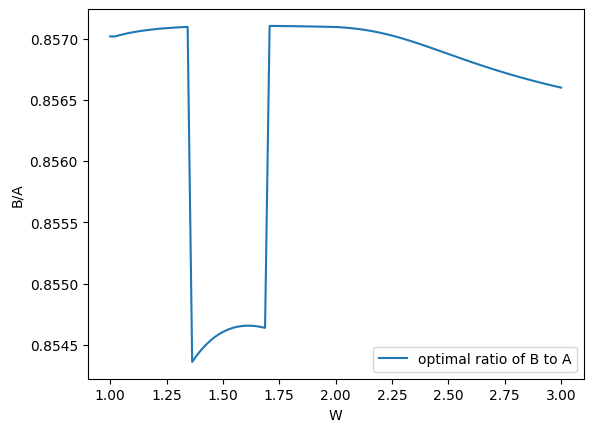

In [42]:
import scipy.optimize as opt
import matplotlib.pyplot as plt
import numpy as np


def objective_function1(ABpair, alpha=0.3):
    A = ABpair[0]
    B = ABpair[1]
    U = (B**alpha)*(A**(1-alpha))
    return -U


def simulate(pA, objFunction, wageRange, T):
    wageGrid = np.linspace(wageRange[0], wageRange[1], T)
    optimalRatios = np.zeros(len(wageGrid))
    initialGuess = [0.1, 0.1]
    boundOfAB = ([0, 1000], [0, 1000])
    for i in range(len(wageGrid)):
        constraintOfUtility= lambda ABpair: pA*ABpair[0]+ABpair[1]-wageGrid[i]
        theConstraintVariable = opt.NonlinearConstraint(constraintOfUtility, -np.inf, 0)
        minima = opt.minimize(objFunction, initialGuess,
                              constraints=theConstraintVariable, bounds=boundOfAB).x
        optimalRatios[i] = minima[1]/minima[0]

    # Plot
    fig, ax = plt.subplots()
    ax.plot(wageGrid, optimalRatios)
    ax.set_xlabel("W")
    ax.set_ylabel("B/A")
    ax.legend(["optimal ratio of B to A"])

    return optimalRatios


simulate(2, objective_function1, [1, 3], 100)

# Result: The B/A ratio is around 0.85


Do the same graph for $ \alpha = 0.5 $ **and compare/interpret.**

array([1.99897422, 1.99883872, 1.9987141 , 1.9986001 , 1.99849524,
       1.99839689, 1.99830162, 1.99820545, 1.99810387, 1.99799226,
       1.99786576, 1.99771967, 1.99754923, 1.99735008, 1.99711781,
       1.99684853, 1.99653853, 1.99618456, 1.99578353, 1.99533289,
       1.99483042, 1.99999616, 1.99999519, 1.99999394, 1.99999248,
       1.99999067, 1.99998842, 1.99998573, 1.9999826 , 1.99997876,
       1.99997434, 1.99996911, 1.99996307, 1.99995608, 1.99994817,
       1.99993908, 1.99992883, 1.99991725, 1.99990427, 1.99988991,
       1.9998709 , 1.99984383, 1.99981164, 1.99977362, 1.99972914,
       1.99967736, 1.99961765, 1.99954915, 1.99947111, 1.99938288,
       1.99928381, 1.99917318, 1.99905031, 1.998915  , 1.99876645,
       1.99860442, 1.99842855, 1.99823861, 1.99803453, 1.99781601,
       1.99758332, 1.99733634, 1.99707506, 1.99679997, 1.99651135,
       1.99620905, 1.99589375, 1.99999157, 1.99999009, 1.99998849,
       1.99998665, 1.99998465, 1.99998247, 1.99998006, 1.99997

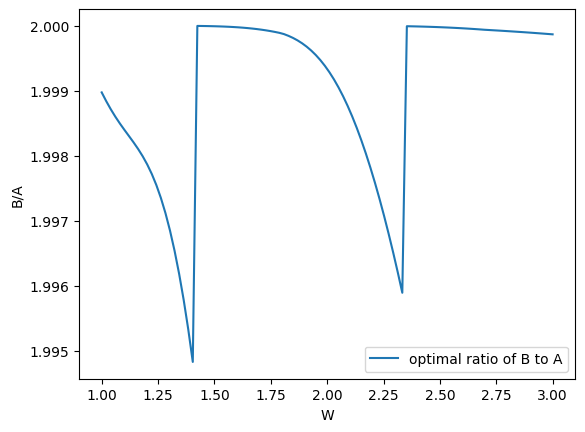

In [43]:
def objective_function2(ABpair, alpha=0.5):
    A = ABpair[0]
    B = ABpair[1]
    U = (B**alpha)*(A**(1-alpha))
    return -U


simulate(2, objective_function2, [1, 3], 100)

# Result: The B/A ratio is around 2.0


## Question 5

Suppose that you own a mobile app that has a "freemium" pricing policy, and you want to model how the behavior of your users depends on the monthly subscription price that you charge.

The population of your potential app users are distributed between three states; Non-users, Free users, and Premium users. **All users begin as Non-users**; a Non-user will never go directly from being a Non-user to being a Premium user, without first trying the app out as a Free user for at least one month. In each month, 5\% of the Non-users will decide to try the app in the next month.

In every time period, 0.5\% of the Free users tend to leave the app and become Non-users again. After those users switch, some of the remaining users will choose to subscribe to the app in a given month (and transfer from the Free user category to the Premium user category). The probability that a Free user who did not already leave the app chooses to subscribe for the next month depends on the monthly price that you charge. If the monthly price is represented by a positive number $p$, then the probability of subscribing is given by $$\mathbb{P}\left[ \text{Free user chooses to subscribe to Premium}\right] = \frac{1-\mathbb{P[\text{Free user chooses to leave the app}]}}{1+p}.$$

Finally, every month 5\% of Premium users will cancel their subscriptions, and 1\%  of Premium users will delete the app and become Non-users again.



Define a function `transition_matrix` over prices $p$, whose output is a row-stochastic version of the matrix that describes the transition probabilities in this economy.

Write another function called `iterate` that takes as arguments $p$ and $t$, where $t$ is the number of months and takes a default value of 6 months, and outputs the distribution of users into categories after $t$ months.

In [44]:
# your code here
def transition_martix(p):
    return np.array([[0.95, 0.05, 0], [0.005, 1-0.005-(1-0.005)/(1+p), (1-0.005)/(1+p)], [0.01, 0.05, 0.94]])


In [45]:
# your code here
def iterate(p, T=6):
    x0 = np.array([1, 0, 0])  # iniitial disrtibution
    nX = x0.shape[0]
    out = np.zeros((T, nX))
    out[0, :] = x0
    A = transition_martix(p)

    for t in range(1, T):
        out[t, :] = A.T @ out[t-1, :]
    return out


Create a figure with three subplots arranged horizontally. On each subplot, show the evolution of your distribution of users over the first year of your new app. Each figure should have time $t$ as the x-axis, and the y-axis should track the proportions of users in each category, for a specific price. On these axes, show how the number of users in each category changes over time with a monthly price equal to $p=0.10$, $p=2$, and $p=20$, respectively. Make sure to clearly label your lines, axes, and subplots.

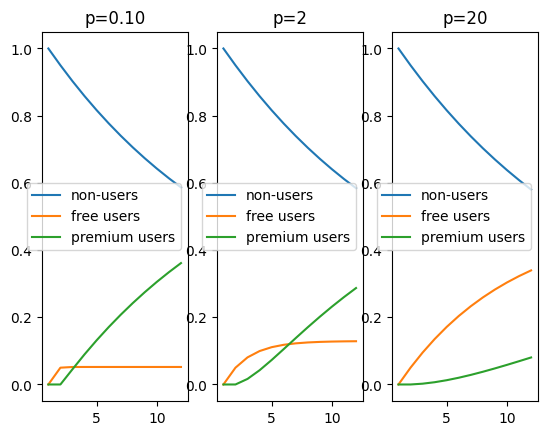

In [46]:
fig, ax = plt.subplots(1, 3)
x = range(1, 13, 1)  # 12 months
y1 = iterate(0.10, T=12)
y2 = iterate(2, T=12)
y3 = iterate(20, T=12)
ax[0].plot(x, y1)
ax[0].set_title("p=0.10")
ax[0].legend(['non-users', 'free users', 'premium users'])

ax[1].plot(x, y2)
ax[1].set_title("p=2")
ax[1].legend(['non-users', 'free users', 'premium users'])

ax[2].plot(x, y3)
ax[2].set_title("p=20")
ax[2].legend(['non-users', 'free users', 'premium users'])


Which of the above prices yields the most premium users after one year? Is this surprising? Why or why not?

When the price increases, the non-users doesn't change, the premium users decreases and the free users increases. The $P=0.10$ yields the most premium users. It is not surprising because as the time pass, more premium users would cancel the subscription or delete the apps if the price is high. As we know, most of free users have probability to switch to premium users. So when the monthly price is low enough, more free users want to become premium users for the low prices. But if the prices comes up, people's probability who choose to subscribe for next month decreased depend on how high the monthly price is.